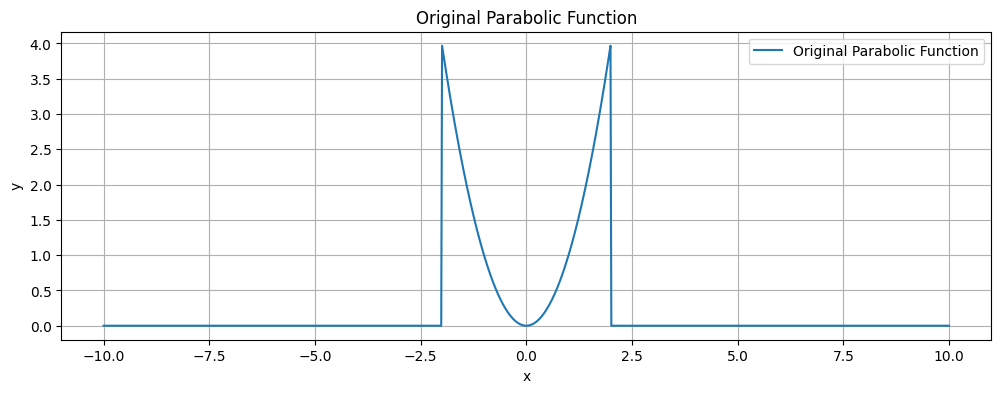

C:\Users\shema\AppData\Local\Temp\ipykernel_22608\3714652949.py:91: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


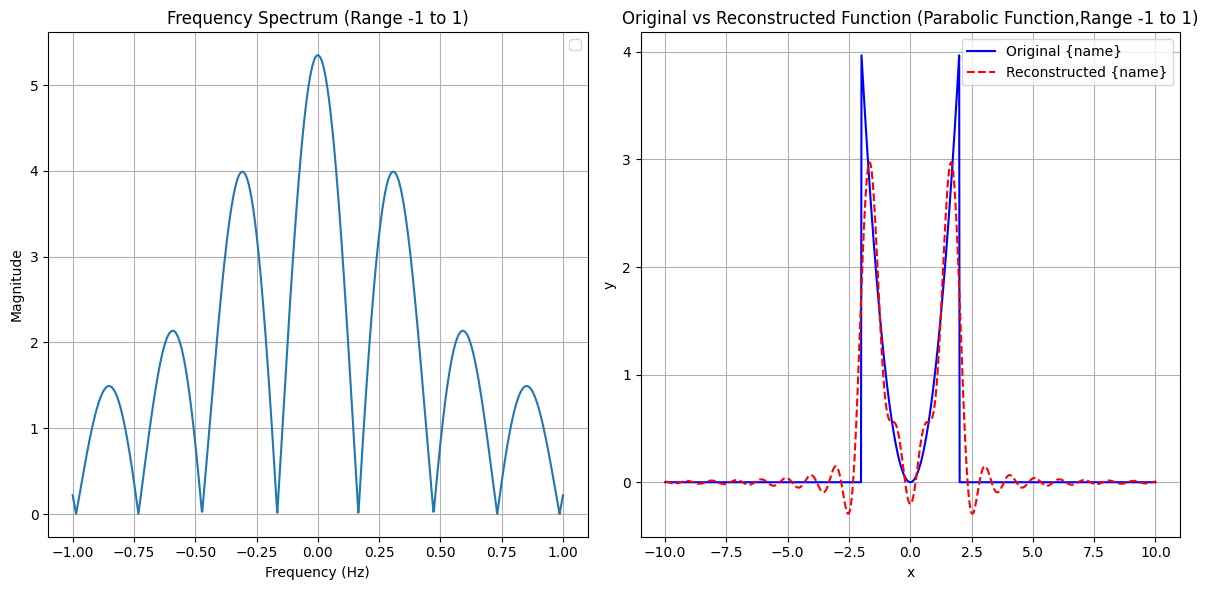

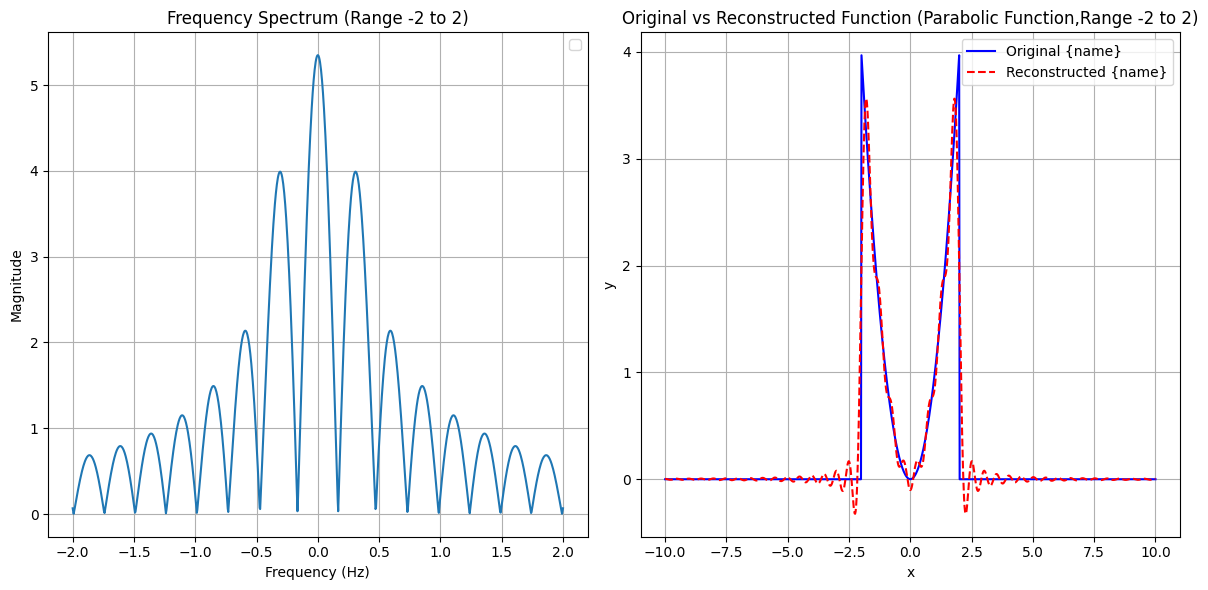

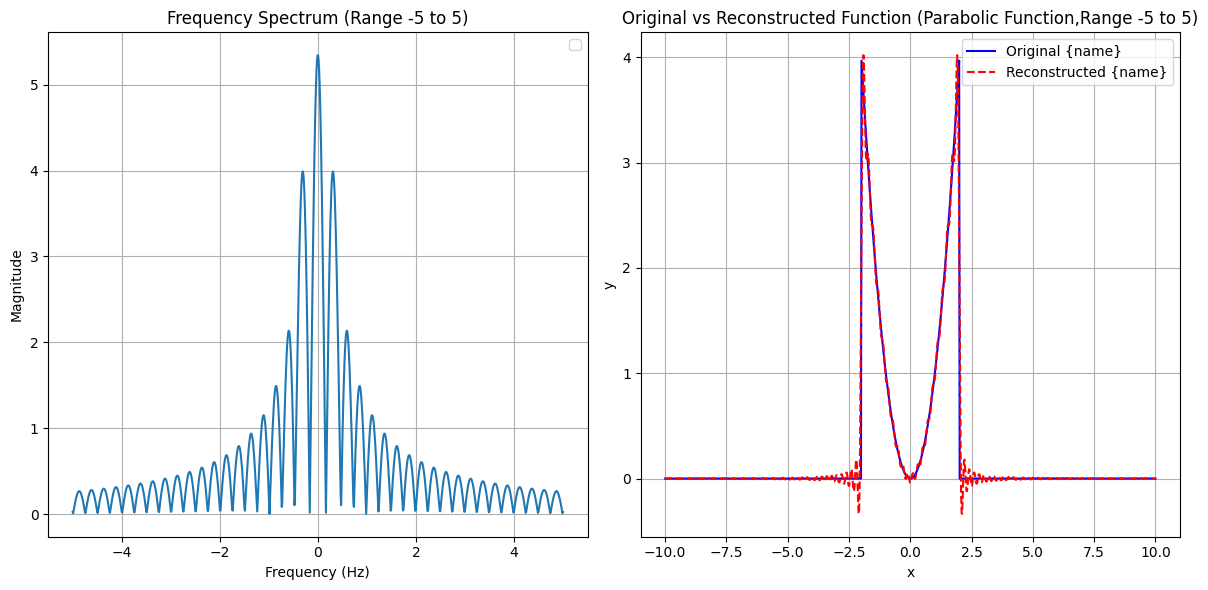

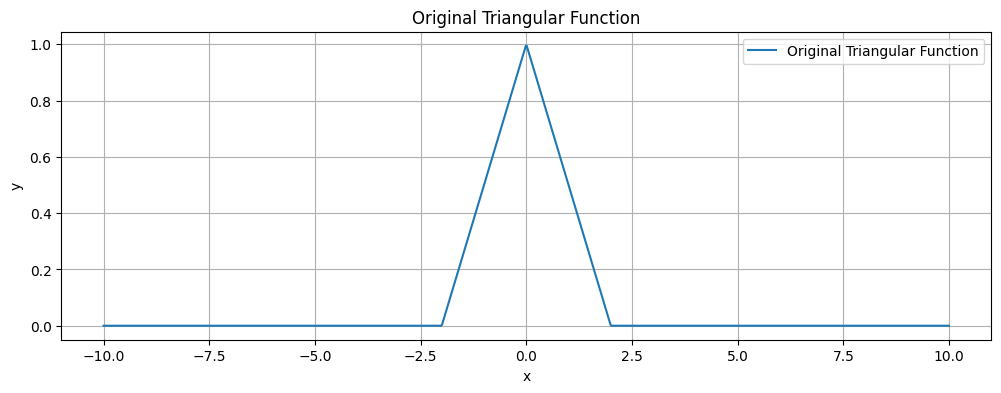

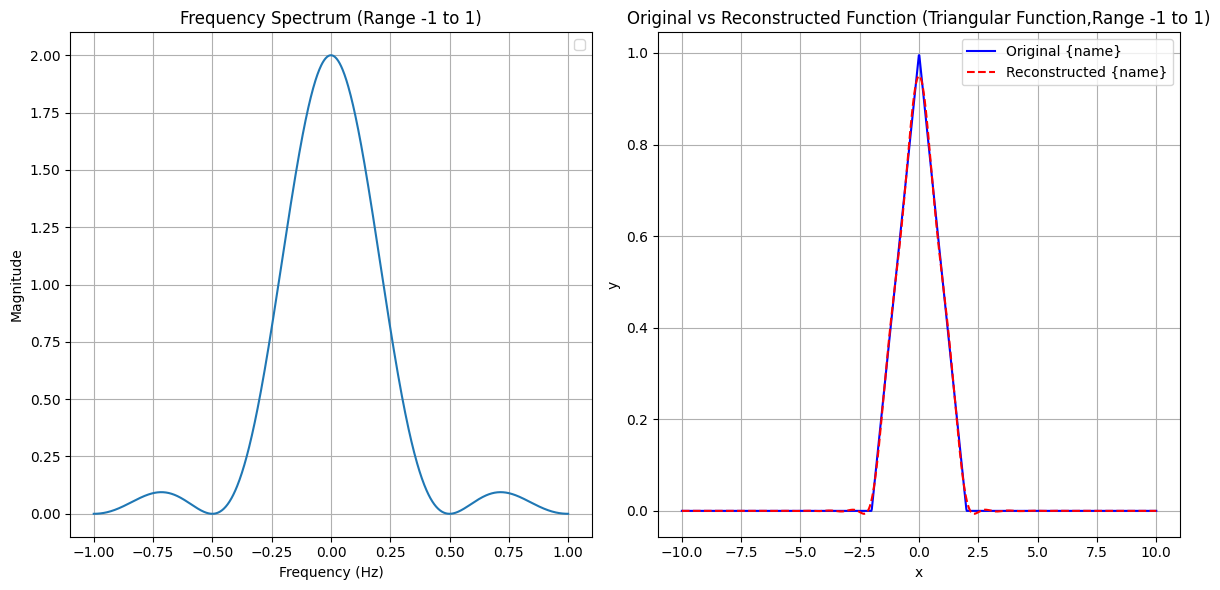

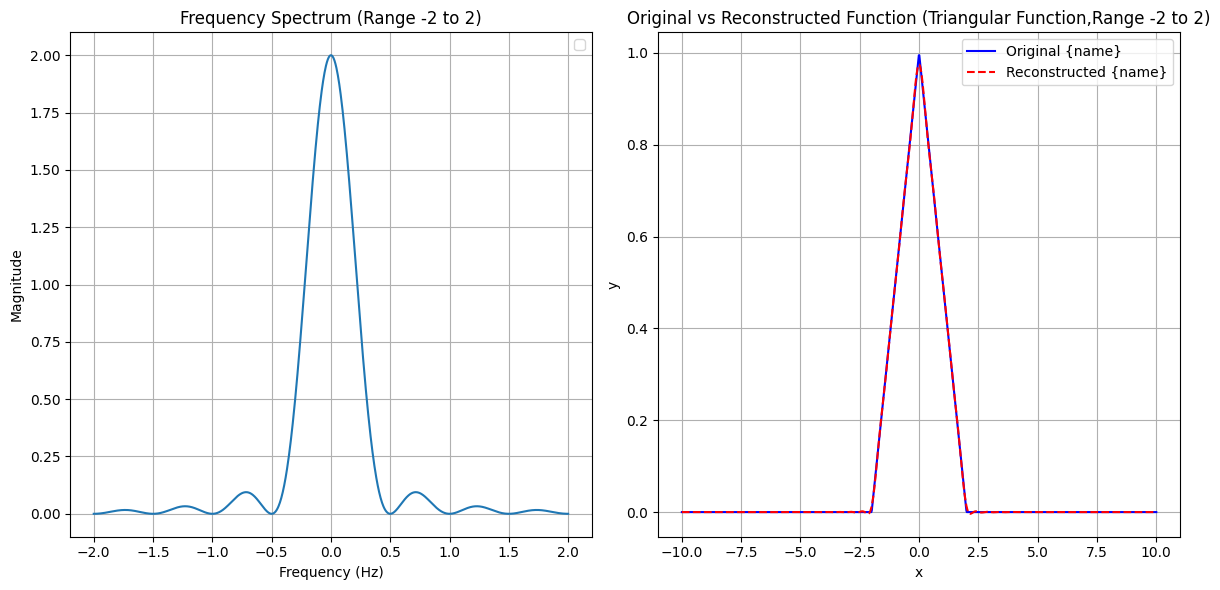

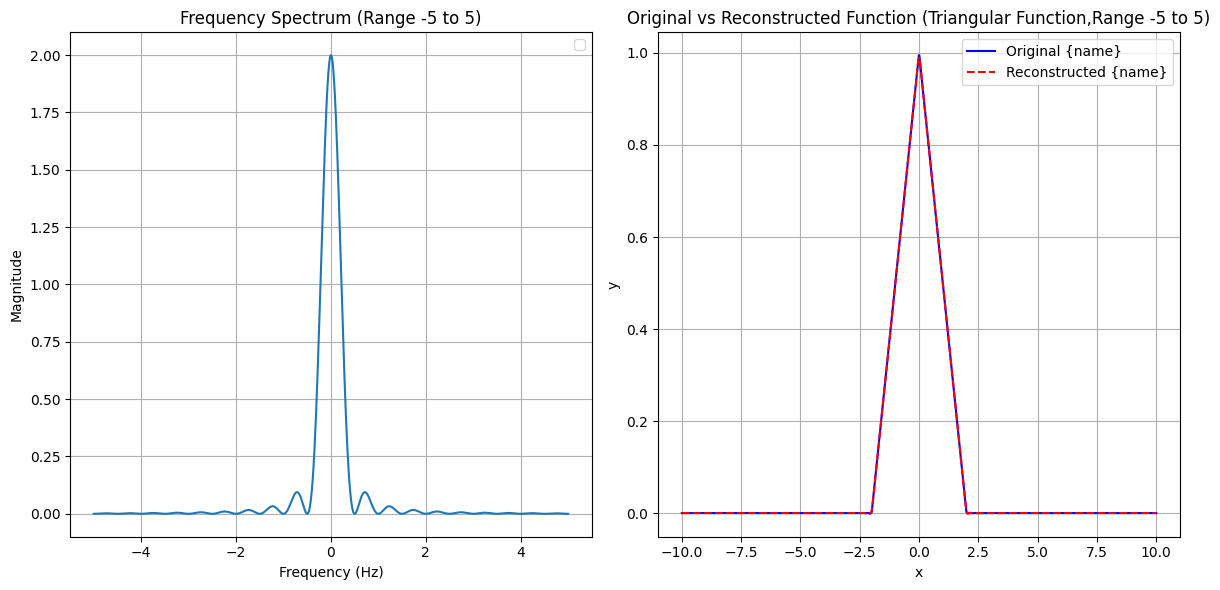

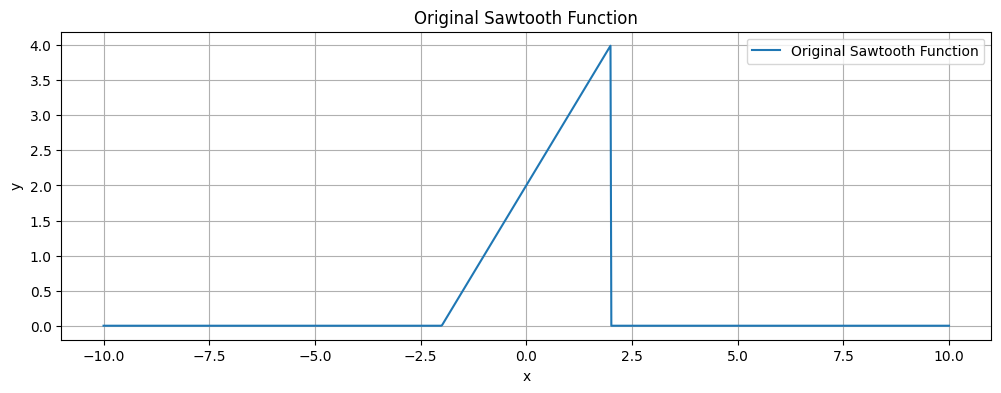

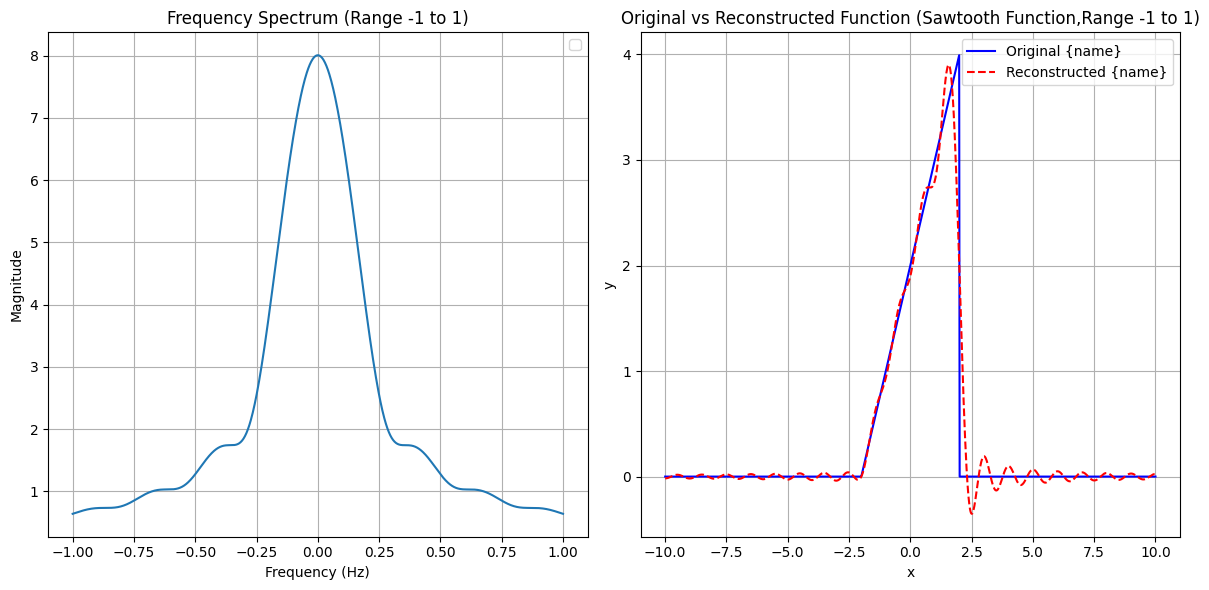

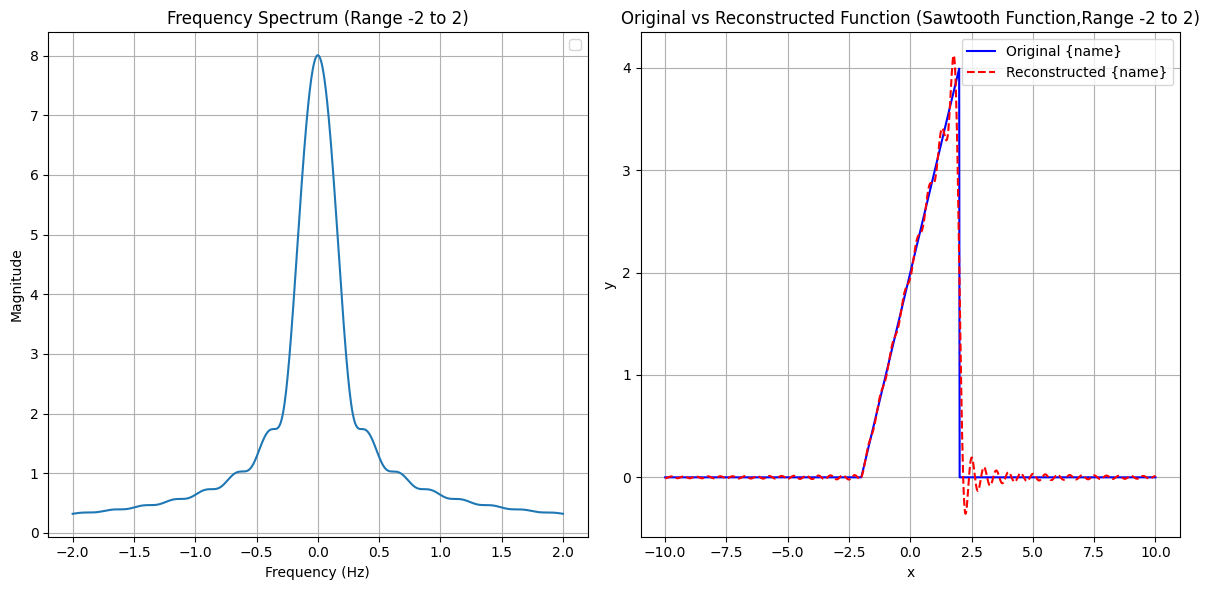

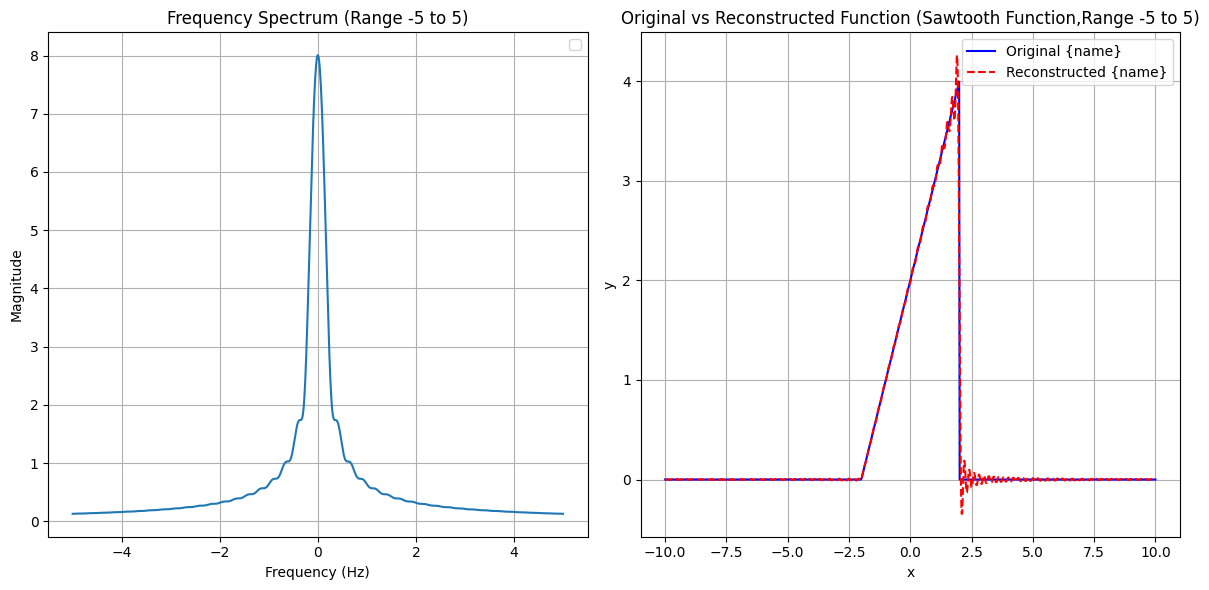

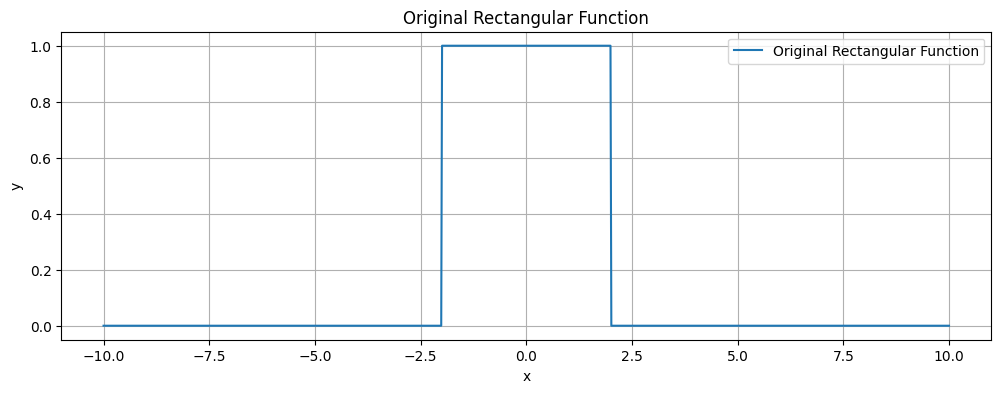

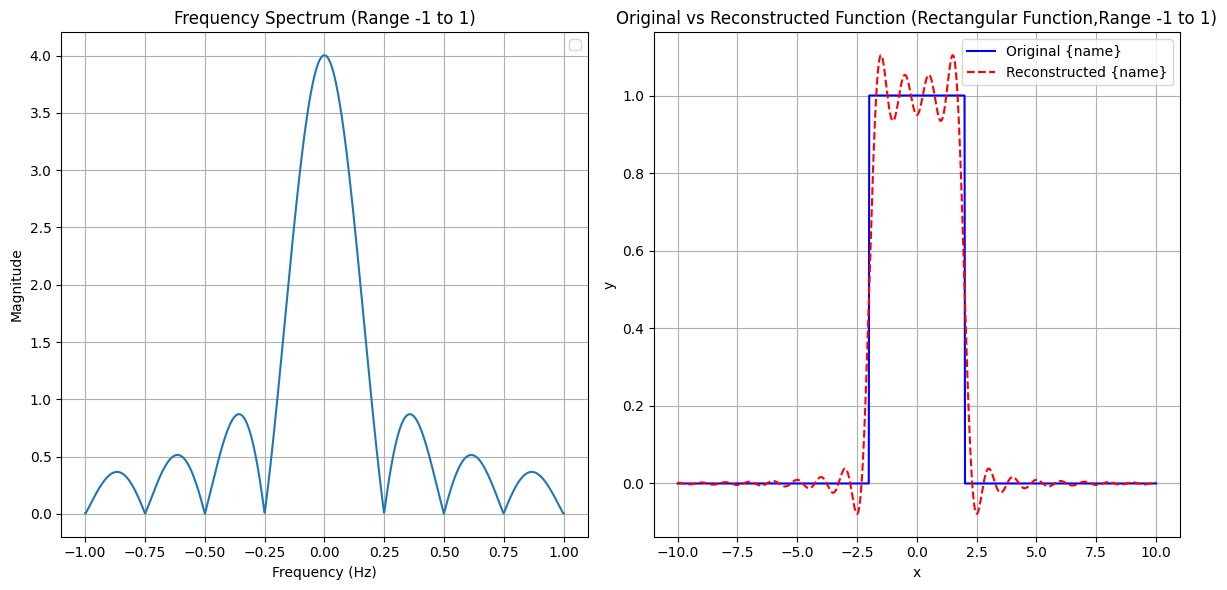

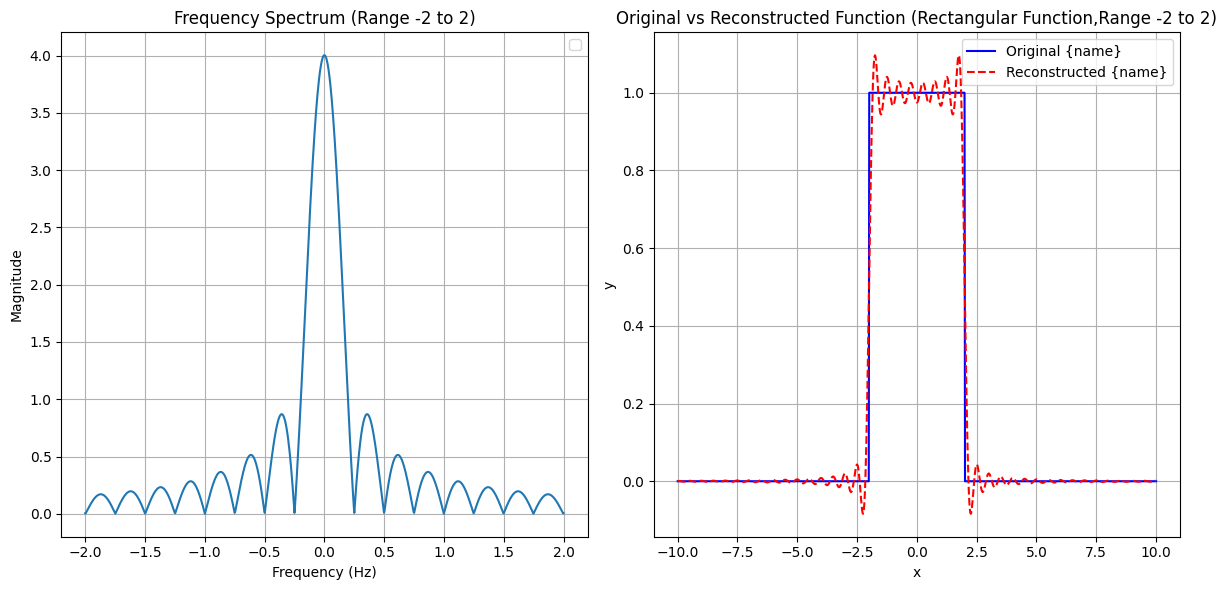

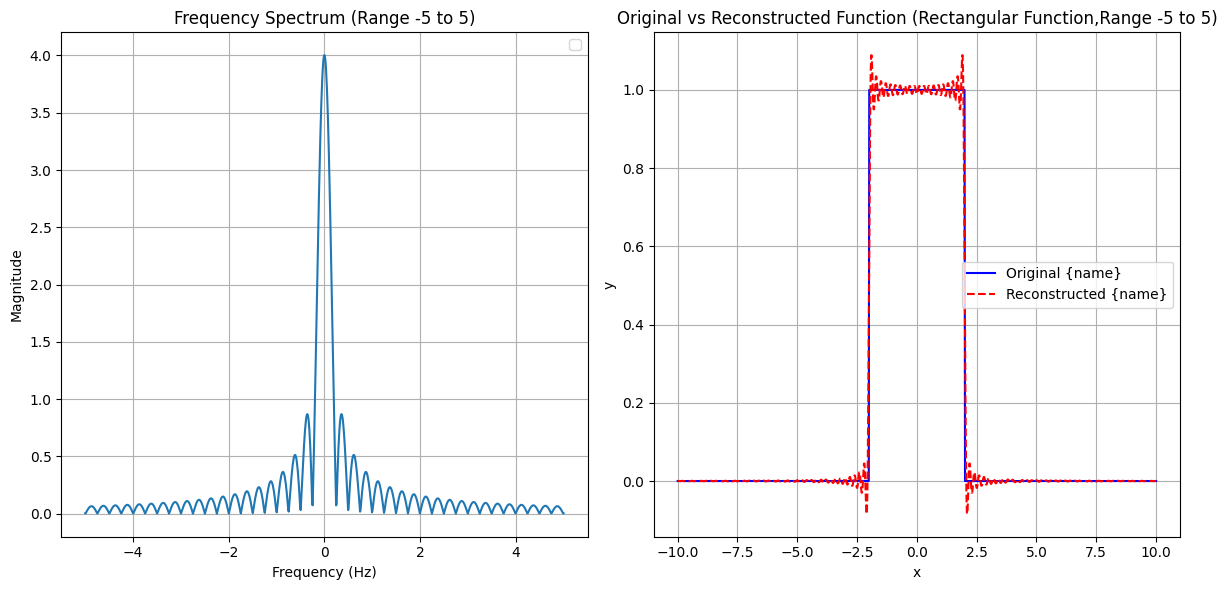

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the interval and function and generate appropriate x values and y values
x_values = np.linspace(-10,10,1000)
dx=x_values[1]-x_values[0]
frequency_ranges = {"Range -1 to 1": (-1, 1), "Range -2 to 2": (-2, 2), "Range -5 to 5": (-5, 5)}


def parabolic_function(x):
    f=x**2
    y=np.where((x>=-2) & (x<=2),f,0)
    return y

def triangular_function(x):
    f=1-np.abs(x)/2
    y=np.where((x>=-2) & (x<=2),f,0)
    return y 
def sawtooth_function(x):
    f=x+2
    y=np.where((x>=-2) & (x<=2),f,0)
    return y
def rectangular_function(x):
    f=1
    y=np.where((x>=-2) & (x<=2),f,0)
    return y






# Define the sampled times and frequencies
sampled_times = x_values

# Fourier Transform 
def fourier_transform(signal, frequencies, sampled_times):
    num_freqs = len(frequencies)
    ft_result_real = np.zeros(num_freqs)
    ft_result_imag = np.zeros(num_freqs)
    for i,f in enumerate(frequencies):
        ft_result_real[i]=np.trapezoid(signal*np.cos(2*np.pi*f*sampled_times),dx=dx)
        ft_result_imag[i]=np.trapezoid(signal*np.sin(2*np.pi*f*sampled_times),dx=dx)
       
    
    # Store the fourier transform results for each frequency. Handle the real and imaginary parts separately
    # use trapezoidal integration to calculate the real and imaginary parts of the FT

    return ft_result_real, ft_result_imag


# Inverse Fourier Transform 
def inverse_fourier_transform(ft_signal, frequencies, sampled_times):
    n = len(sampled_times)
    reconstructed_signal = np.zeros(n)
    # Reconstruct the signal by summing over all frequencies for each time in sampled_times.
    # use trapezoidal integration to calculate the real part
    # You have to return only the real part of the reconstructed signal
    for(i,t) in enumerate(sampled_times):
        reconstructed_signal[i] = np.trapezoid(ft_signal[0]*np.cos(2*np.pi*frequencies*t)+ft_signal[1]*np.sin(2*np.pi*frequencies*t),dx=frequencies[1]-frequencies[0])
    
    return reconstructed_signal



def plot_function(function,name):
    y_values=function(x_values)
    # Plot the original function
    plt.figure(figsize=(12, 4))
    plt.plot(x_values, y_values, label=f"Original {name}")
    plt.title(f"Original {name}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.legend()
    plt.show()

    # Apply FT to the sampled data
    for label,freq_range in frequency_ranges.items():
        freqmin,freqmax=freq_range
        frequencies = np.linspace(freqmin, freqmax, 1000)
        ft_data = fourier_transform( y_values, frequencies, sampled_times)
        #  plot the FT data
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(frequencies, np.sqrt(ft_data[0]**2 + ft_data[1]**2))
        plt.title(f"Frequency Spectrum ({label})")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.grid()
        plt.legend()


        # Reconstruct the signal from the FT data
        
        reconstructed_y_values = inverse_fourier_transform(ft_data, frequencies, sampled_times)
        # Plot the original and reconstructed functions for comparison
        plt.subplot(1,2,2)
        plt.plot(x_values,  y_values, label="Original {name}", color="blue")
        plt.plot(sampled_times, reconstructed_y_values, label="Reconstructed {name}", color="red", linestyle="--")
        plt.title(f"Original vs Reconstructed Function ({name},{label})")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid()
        plt.legend()

        plt.tight_layout()
        plt.show()

plot_function(parabolic_function, "Parabolic Function")
plot_function(triangular_function, "Triangular Function")
plot_function(sawtooth_function, "Sawtooth Function")
plot_function(rectangular_function, "Rectangular Function")


